In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data import get_data

Data Fearuring

In [2]:
df = get_data()
df.describe()

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

Finding Outliers

In [3]:
iqr = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
lower_bound = df['Price'].quantile(0.25) - 1.5 * iqr
upper_bound = df['Price'].quantile(0.75) + 1.5 * iqr
print(lower_bound, upper_bound)
df = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]
df

-64375.0 112625.0


,Order_ID,Date,Product,Category,Quantity,Price,Month,Year
0,1001,2024-01-05,Laptop,Electronics,1,55000,1,2024
1,1002,2024-01-07,Mobile,Electronics,2,20000,1,2024
2,1003,2024-01-10,Headphones,Accessories,3,2000,1,2024
3,1004,2024-02-03,Laptop,Electronics,1,55000,2,2024
4,1005,2024-02-10,Mobile,Electronics,1,20000,2,2024
5,1006,2024-02-15,Keyboard,Accessories,2,1500,2,2024
6,1007,2024-03-01,Mobile,Electronics,3,20000,3,2024
7,1008,2024-03-05,Laptop,Electronics,2,55000,3,2024
8,1009,2024-03-10,Mouse,Accessories,4,800,3,2024
9,1010,2024-03-15,Headphones,Accessories,1,2000,3,2024


Adding Revenue column

In [4]:
df["Revenue"] = df["Price"] * df["Quantity"]
df

,Order_ID,Date,Product,Category,Quantity,Price,Month,Year,Revenue
0,1001,2024-01-05,Laptop,Electronics,1,55000,1,2024,55000
1,1002,2024-01-07,Mobile,Electronics,2,20000,1,2024,40000
2,1003,2024-01-10,Headphones,Accessories,3,2000,1,2024,6000
3,1004,2024-02-03,Laptop,Electronics,1,55000,2,2024,55000
4,1005,2024-02-10,Mobile,Electronics,1,20000,2,2024,20000
5,1006,2024-02-15,Keyboard,Accessories,2,1500,2,2024,3000
6,1007,2024-03-01,Mobile,Electronics,3,20000,3,2024,60000
7,1008,2024-03-05,Laptop,Electronics,2,55000,3,2024,110000
8,1009,2024-03-10,Mouse,Accessories,4,800,3,2024,3200
9,1010,2024-03-15,Headphones,Accessories,1,2000,3,2024,2000


Grouping to find which product is generating highest Revenue

In [5]:
Product_Revenue = df.groupby(["Product"])["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False).reset_index(drop=True)
Product_Revenue

,Product,Revenue
0,Laptop,220000
1,Mobile,120000
2,Headphones,8000
3,Mouse,3200
4,Keyboard,3000


1. Which catagory product is generating highest revenue
2. Which month has highest and lowest revenue

In [6]:
Categorical_Revenue = df.groupby(["Category", "Month"])["Revenue"].sum().reset_index()
Categorical_Revenue

,Category,Month,Revenue
0,Accessories,1,6000
1,Accessories,2,3000
2,Accessories,3,5200
3,Electronics,1,95000
4,Electronics,2,75000
5,Electronics,3,170000


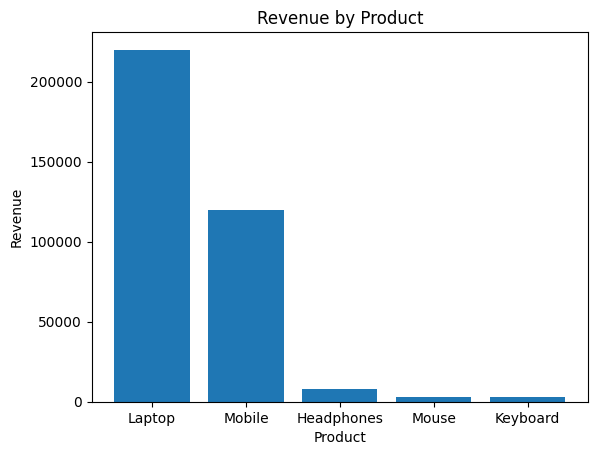

In [7]:
plt.bar(Product_Revenue["Product"], Product_Revenue["Revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show() 

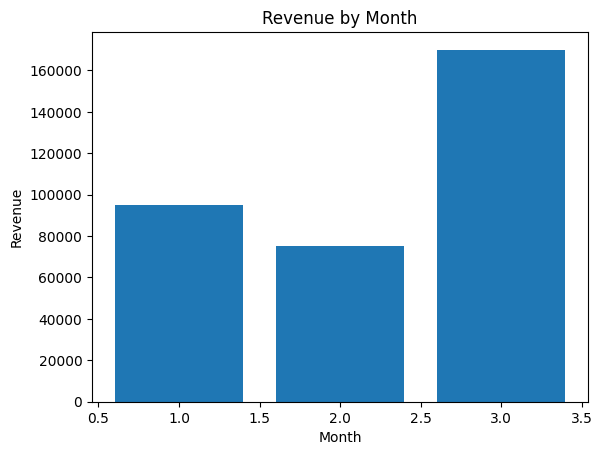

In [8]:
plt.bar(Categorical_Revenue["Month"], Categorical_Revenue["Revenue"])
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue by Month")
plt.show()

In [9]:
max = df["Revenue"].max()
min = df["Revenue"].min()
mean = df["Revenue"].mean()

print("Max Revenue:", max)
print("Min Revenue:", min)
print("Mean Revenue:", mean)

Max Revenue: 110000
Min Revenue: 2000
Mean Revenue: 35420.0


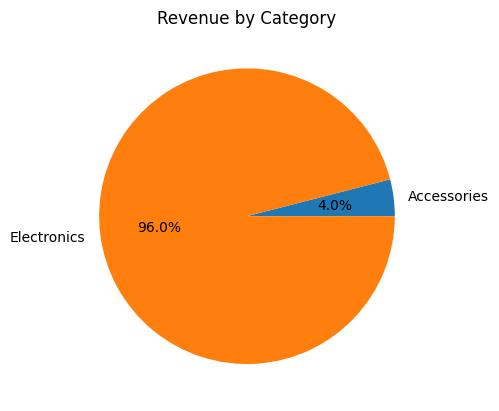

In [10]:
plt.pie(Categorical_Revenue.groupby("Category")["Revenue"].sum() , labels=Categorical_Revenue["Category"].unique(), autopct="%1.1f%%")

plt.title("Revenue by Category")
plt.show()

Electronics gave 96% of revenue out of total revenue and Accessories gave 4%  

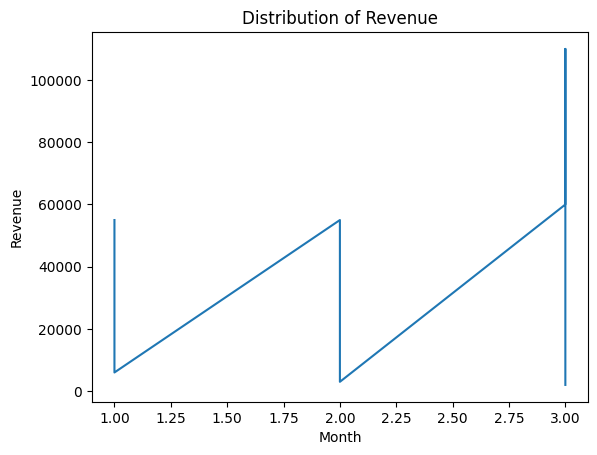

In [11]:
plt.plot(df["Month"], df["Revenue"])
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Distribution of Revenue")
plt.show()